# Lab 4 - Fish Classier deplolyed on Heroku.

In this notebook, we will explore, pre-process and prepare data for model training. I will be approachig the problem as a classification problem. 

# 1. Business Problem
Fish markets are competitive to work in. The cut-throat competitive environment breeds innovation and frugal techniques to maximize sales. One of the fish market leaders in Vancouver decided to use machine learning to determine the fish type. This will be beneficial for the business and customers in the long-run.

# 2. Load Data

In [3]:
import pandas as pd
import pathlib
import os


data_dir = '../data/'
filename = 'Fish.csv'
path_to_data = pathlib.Path(os.path.join(data_dir, filename))

if path_to_data.exists():
    data_df = pd.read_csv(path_to_data)
else:
    raise FileNotFoundError(f'Please check the file path, the location'
                            f'provided does not contain any file with the name: {filename}')
    data_df = None
    
data_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# 3. Exploratory Data Analysis

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


The dataset has `159 samples`, `7 variables`, the target variable for the model to be built will be column **`0` Species**.

In [5]:
data_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [16]:
# check the number of classes/species in the dataset.
len(data_df['Species'].value_counts())

7

> There are `7` different species (classes).

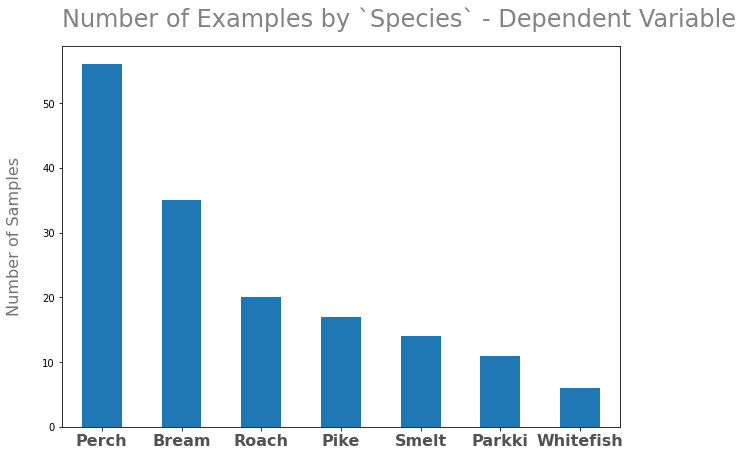

In [14]:
import matplotlib.pyplot as plt


# Plot a graph to visualize the number of samples for each dependent variable category.
fig, ax = plt.subplots(figsize=(10,7))

# Count the number samples for each category and plot.
data_df['Species'].value_counts().plot(kind="bar", ax=ax)

# Other formatting settings.
ax.set_title("Number of Examples by `Species` - Dependent Variable",
             fontdict={"size": 24, "color": "#838383"}, pad=20, loc="left");

ax.set_ylabel("Number of Samples", fontdict={"size": 16, "color":"#727272"}, labelpad=20);
plt.xticks(fontsize=16, weight="bold", color="#525252", rotation=0);

In [24]:
# Create a sweetviz report for a more detailed comparison of variables in the dataset.
import sweetviz as sv
import warnings


warnings.filterwarnings('ignore')
path_to_report = '../docs/html/SWEETVIZ_REPORT.html'

if not pathlib.Path(path_to_report).exists():
    mushrooms_report = sv.analyze(data_df)
    mushrooms_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 4. Data Preparation



In [25]:
# Define x and y variables for the algorithm
X = data_df.drop('Species', axis=1)
y = data_df['Species']

Setting the train-test split at **`80-20`**.

In [31]:
from sklearn.model_selection import train_test_split


# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)

# 4. Model Creation and Training

Considering the insights developed in [`3. Exploratory Data Analysis`](#eda) section, the following three models were chosen to tackle the classification problem.
> **Linear Support Vector Classifier**

In [33]:
from sklearn.svm import SVC


# Defining and fitting a SVM instance
model = SVC(kernel='linear', random_state=100)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=100)

# 5. Model Testing and Exporting

In [35]:
model.score(X_test, y_test)

0.9375

The model accuracy is high enough to be deployed.

In [44]:
# Save model
import pickle

path_to_model = pathlib.Path('../models/linear-svc-base.pkl')

with path_to_model.open('wb') as f:
    pickle.dump(model, f)